# Aiida

## Define workflow with aiida

In [1]:
from python_workflow_definition.aiida import write_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import orm, load_profile
load_profile()

workflow_json_filename =  "aiida_simple.json"

In [ ]:
from arithmetic_workflow import (
    get_sum as _get_sum,
    get_prod_and_div as _get_prod_and_div,
)

In [ ]:
wg = WorkGraph("arithmetic")

In [4]:
get_prod_and_div_task = wg.add_task(
    task(outputs=['prod', 'div'])(_get_prod_and_div),
    name="get_prod_and_div",
    x=orm.Float(1),
    y=orm.Float(2),
)

In [5]:
get_sum_task = wg.add_task(
    _get_sum,
    name="get_sum",
    x=get_prod_and_div_task.outputs.prod,
    y=get_prod_and_div_task.outputs.div,
)

In [6]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)

{'nodes': [{'id': 0, 'function': 'arithmetic_workflow.get_prod_and_div'},
  {'id': 1, 'function': 'arithmetic_workflow.get_sum'},
  {'id': 2, 'value': 1.0},
  {'id': 3, 'value': 2.0}],
 'edges': [{'target': 1, 'targetPort': 'x', 'source': 0, 'sourcePort': 'prod'},
  {'target': 1, 'targetPort': 'y', 'source': 0, 'sourcePort': 'div'},
  {'target': 0, 'targetPort': 'x', 'source': 2, 'sourcePort': None},
  {'target': 0, 'targetPort': 'y', 'source': 3, 'sourcePort': None}]}

In [7]:
!cat {workflow_json_filename}

{
  "nodes": [
    {
      "id": 0,
      "function": "arithmetic_workflow.get_prod_and_div"
    },
    {
      "id": 1,
      "function": "arithmetic_workflow.get_sum"
    },
    {
      "id": 2,
      "value": 1.0
    },
    {
      "id": 3,
      "value": 2.0
    }
  ],
  "edges": [
    {
      "target": 1,
      "targetPort": "x",
      "source": 0,
      "sourcePort": "prod"
    },
    {
      "target": 1,
      "targetPort": "y",
      "source": 0,
      "sourcePort": "div"
    },
    {
      "target": 0,
      "targetPort": "x",
      "source": 2,
      "sourcePort": null
    },
    {
      "target": 0,
      "targetPort": "y",
      "source": 3,
      "sourcePort": null
    }
  ]
}

## Load Workflow with jobflow

In [8]:
from python_workflow_definition.jobflow import load_workflow_json

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [9]:
from jobflow.managers.local import run_locally

In [10]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [11]:
result = run_locally(flow)
result

2025-04-23 09:27:52,129 INFO Started executing jobs locally
2025-04-23 09:27:52,561 INFO Starting job - get_prod_and_div (6eae194f-04a4-4c7c-b0d9-baf624bac375)
2025-04-23 09:27:52,564 INFO Finished job - get_prod_and_div (6eae194f-04a4-4c7c-b0d9-baf624bac375)
2025-04-23 09:27:52,564 INFO Starting job - get_sum (21fda98d-7701-45c7-a30a-816e9a91ab75)
2025-04-23 09:27:52,566 INFO Finished job - get_sum (21fda98d-7701-45c7-a30a-816e9a91ab75)
2025-04-23 09:27:52,566 INFO Finished executing jobs locally


{'6eae194f-04a4-4c7c-b0d9-baf624bac375': {1: Response(output={'prod': 2.0, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 '21fda98d-7701-45c7-a30a-816e9a91ab75': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))}}

## Load Workflow with pyiron_base

In [12]:
from python_workflow_definition.pyiron_base import load_workflow_json

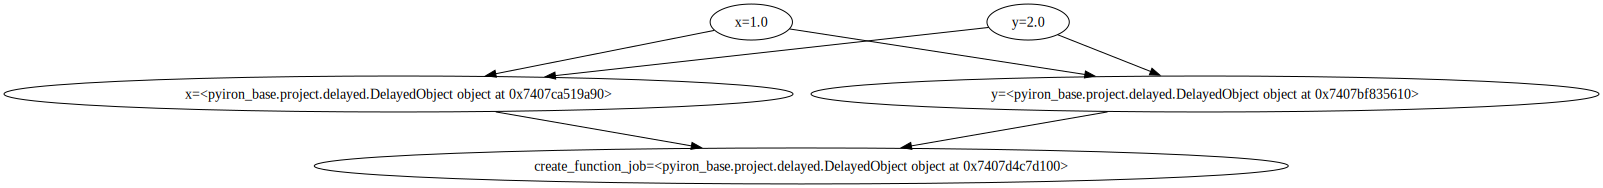

In [13]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [14]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_7c19c6233dddb02781fc331f609558a1 was saved and received the ID: 1
The job get_sum_92b8e0a2d45fff6b04940562a8d7d8f7 was saved and received the ID: 2


2.5